In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

In [14]:
df_exon = pd.read_csv('Exxon.csv')

In [15]:
df_exon["Date"] = df_exon["Date"].apply(lambda x:x.split(" ")[0])

In [16]:
df_exon["Date"] = pd.to_datetime((df_exon["Date"]))

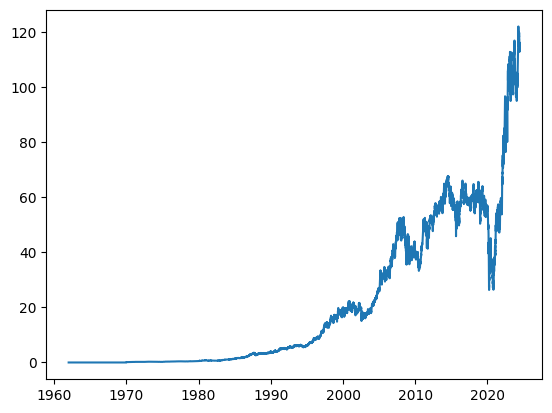

In [6]:
plt.plot(df_exon["Date"],df_exon["Open"])

In [17]:
df_exon = df_exon[df_exon["Open"]>0.0]

In [18]:
df_exon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, 1987 to 15716
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          13730 non-null  datetime64[ns]
 1   Open          13730 non-null  float64       
 2   High          13730 non-null  float64       
 3   Low           13730 non-null  float64       
 4   Close         13730 non-null  float64       
 5   Volume        13730 non-null  int64         
 6   Dividends     13730 non-null  float64       
 7   Stock Splits  13730 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 965.4 KB


In [19]:
df_exon = df_exon[["Date","Close"]]

In [10]:
"""df_exon["day"] = df_exon["Date"].apply(lambda x: x.day)
df_exon["day_of_week"] = df_exon["Date"].apply(lambda x: x.day)
df_exon["day"] = df_exon["Date"].apply(lambda x: x.day)"""

In [20]:
df_exon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, 1987 to 15716
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13730 non-null  datetime64[ns]
 1   Close   13730 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 321.8 KB


In [35]:
!pip install keras 

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.1 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.8/3.0 MB 25.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.9/3.0 MB 23.8 MB/s eta 0:00:01
   ---------------------------------------  3.0/3.0 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 21.1 MB/s eta 0:00:00
   ------------------

# LSTM

In [21]:
df_exon.shape

(13730, 2)

In [22]:
df_exon.set_index("Date",inplace=True)

In [23]:
test_size = 1373
test_ind = len(df_exon)- test_size

In [24]:
train = df_exon.iloc[:test_ind]
test = df_exon.iloc[test_ind:]

In [25]:
!pip install scikit-learn

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(train)

MinMaxScaler()

In [29]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [53]:
!pip install tensorflow

   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/377.1 MB 17.3 MB/s eta 0:00:22
   ---------------------------------------- 1.0/377.1 MB 13.0 MB/s eta 0:00:29
   ---------------------------------------- 1.4/377.1 MB 11.3 MB/s eta 0:00:34
   ---------------------------------------- 1.6/377.1 MB 10.4 MB/s eta 0:00:37
   ---------------------------------------- 1.6/377.1 MB 10.4 MB/s eta 0:00:37
   ---------------------------------------- 2.1/377.1 MB 8.4 MB/s eta 0:00:45
   ---------------------------------------- 2.5/377.1 MB 8.5 MB/s eta 0:00:45
   ---------------------------------------- 3.0/377.1 MB 8.3 MB/s eta 0:00:46
   ---------------------------------------- 3.3/377.1 MB 8.2 MB/s eta 0:00:46
   ---------------------------------------- 3.5/377.1 MB 7.9 MB/s eta 0:00:48
   ---------------------------------------- 3.7/377.1 MB 7.6 MB/s eta 0:00:50
   ---------------------------------------- 4.0/377.1 MB 7.3 MB/s 

In [30]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [31]:
length = 7
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [33]:
# définir le modèle
"""model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
"""
# définir le modèle
model = Sequential()

# Première couche LSTM avec Dropout
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(length, n_features)))

# Deuxième couche LSTM
model.add(LSTM(100, activation='relu'))

# Couche Dense
model.add(Dense(50, activation='relu'))

# Couche de sortie
model.add(Dense(1))

# Compiler le modèle
model.compile(optimizer='adam', loss='mse')


C:\Users\corex\Desktop\python\projet_detect\projet_technique\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,301 (493.36 KB)

 Trainable params: 126,301 (493.36 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [38]:
# ajustement du modèle
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
   32/12350 ━━━━━━━━━━━━━━━━━━━━ 1:02 5ms/step - loss: 0.0825

C:\Users\corex\Desktop\python\projet_detect\projet_technique\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12350/12350 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 2/20
12350/12350 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - loss: 2.6589e-04 - val_loss: 0.0018
Epoch 3/20
12350/12350 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - loss: 1.5453e-04 - val_loss: 0.0035
Epoch 4/20
12350/12350 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - loss: 1.2468e-04 - val_loss: 0.0032


<Axes: >

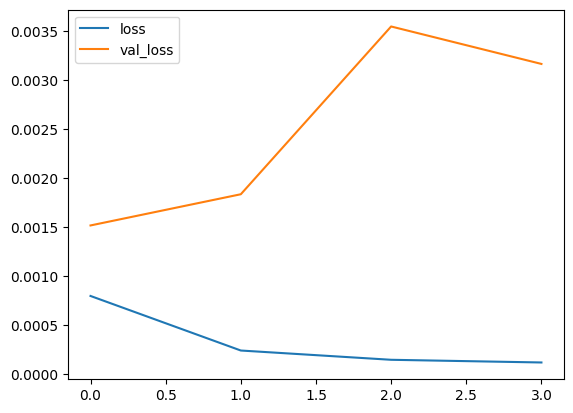

In [39]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [40]:
import numpy as np

In [41]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [42]:
current_batch

array([[[0.84989327],
        [0.83253702],
        [0.80954522],
        [0.79579507],
        [0.77156337],
        [0.76581529],
        [0.73639929]]])

In [43]:
current_pred = model.predict(current_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


In [44]:
current_pred

array([0.7347068], dtype=float32)

In [46]:
test_predictions.append(current_pred) 

In [47]:
test_predictions

[array([0.7347068], dtype=float32)]

In [63]:
[scaled_test[1]]

[array([0.77505733])]

In [54]:
np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

array([[[0.83253702],
        [0.80954522],
        [0.79579507],
        [0.77156337],
        [0.76581529],
        [0.73639929],
        [0.73470682]]])

In [53]:
[[current_pred]]

[[array([0.7347068], dtype=float32)]]

In [50]:
current_batch[:,1:]

array([[[0.83253702],
        [0.80954522],
        [0.79579507],
        [0.77156337],
        [0.76581529],
        [0.73639929]]])

In [51]:
current_batch

array([[[0.84989327],
        [0.83253702],
        [0.80954522],
        [0.79579507],
        [0.77156337],
        [0.76581529],
        [0.73639929]]])

In [52]:
current_batch[:,1:,:]

array([[[0.83253702],
        [0.80954522],
        [0.79579507],
        [0.77156337],
        [0.76581529],
        [0.73639929]]])

In [64]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # obtenir la prédiction avec 1 timestamp d'avance ([0] pour ne saisir que le nombre au lieu de [array])
    current_pred = model.predict(current_batch)[0]
    
    # stocker la prédiction
    test_predictions.append(current_pred) 
    
    # mise à jour du batch pour inclure maintenant la prédiction et supprimer la première valeur
    current_batch = np.append(current_batch[:,1:,:],[[scaled_test[i]]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━

In [65]:
true_predictions = scaler.inverse_transform(test_predictions)

In [66]:
test['Predictions'] = true_predictions

C:\Users\corex\AppData\Local\Temp\ipykernel_15724\2515899287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [67]:
test

,Close,Predictions
Date,,
2018-12-26,52.235779,49.739538
2018-12-27,52.464092,50.861385
2018-12-28,51.878109,51.595176
2018-12-31,51.893333,51.673246
2019-01-02,53.034847,51.806591
...,...,...
2024-06-04,112.669998,106.720962
2024-06-05,113.120003,105.635357
2024-06-06,113.970001,106.075539


<Axes: xlabel='Date'>

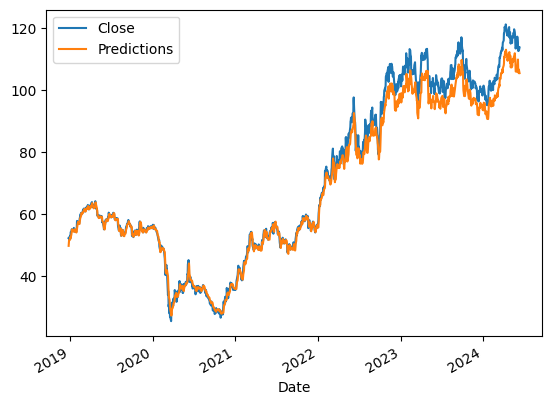

In [68]:
test.plot()

In [69]:
import pickle

with open("model_exon.pkl", "wb") as f:
    pickle.dump(model, f)

In [70]:
# Sauvegarder le scaler
with open('scaler_exon.pkl', 'wb') as file:
    pickle.dump(scaler, file)